# Non-LBT Baseline: UNet

In [22]:
from base.get_data import generate_cell_data

#generate_cell_data()

In [23]:
import torch
from lbt.models import unet
from base import gpu_test


device = gpu_test.get_device()
device.type

criterion = torch.nn.MSELoss()
criterion = criterion.cuda()

model = unet.UNET(1, in_channels = 3, criterion = criterion, aux = False)
model = model.cuda()

optimizer = torch.optim.SGD(
      model.parameters(),
      0.025,
      momentum=0.9,
      weight_decay=3e-4)

Using device: cuda

GeForce RTX 3070
Memory Usage:
Allocated: 1.0 GB
Cached:    1.0 GB
This model does not need pretrained backbone


# Helper Functions

In [24]:
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tqdm.autonotebook import tqdm

def train_model(train_queue, mdoel, criterion, optimizer):
    print("Training: ")
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(train_queue):

        model.train()

        image = image.cuda()
        label = label.cuda()

        optimizer.zero_grad()

        logits = model(image)[0]
        
        
        loss = criterion(logits, label)
        
        
        loss.backward()
        torch.nn.utils.clip_grad_norm(model.parameters(), 5)
        optimizer.step()
        loss_vals.append(loss.item())

        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)

    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Train")



def validate_model(valid_queue, model, criterion):
    
    print("Validation: ")
    
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(valid_queue):
        image = Variable(image, volatile=True).cuda()
        label = Variable(label, volatile=True).cuda()
        
        logits = model(image)[0]
        
        
        loss = criterion(logits, label)
        
        loss_vals.append(loss.item())
        
        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)
        
    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Validation")

In [25]:
import matplotlib.pyplot as plt

def plot(true_values, predicted_values, title):
    """Plot true vs predicted counts and loss."""
   

    fig = plt.figure()
    plt.scatter(true_values, predicted_values)

    plt.title(title)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.show()
    

# Training Model

Epoch:  0
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.8310112535953522
MAE:  83.66956356404621
MSE:  12354.295035095372


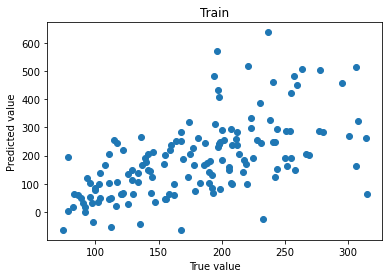

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  2.223498064279556
MAE:  186.40917260742185
MSE:  59023.634519000945


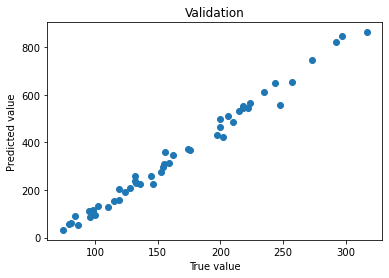

Epoch:  1
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.6464980947971344
MAE:  81.84615674235026
MSE:  12010.000401083784


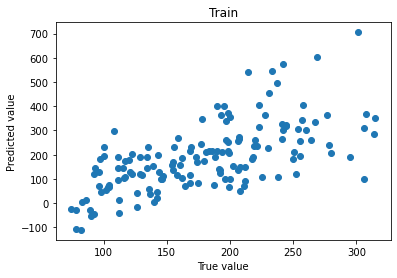

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.5645974063873291
MAE:  23.67515830078125
MSE:  631.9503761169314


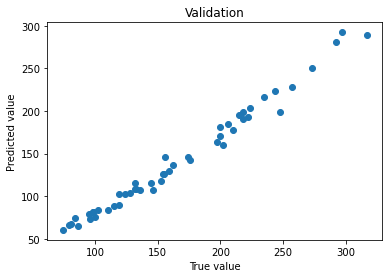

Epoch:  2
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.4108941169579823
MAE:  39.05614409586588
MSE:  2570.495131619016


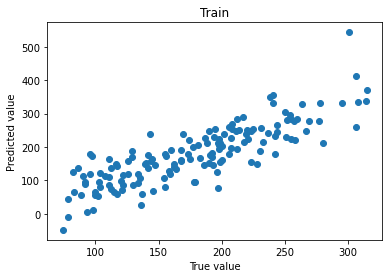

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0246895337104798
MAE:  50.586213574218746
MSE:  2587.5107508704664


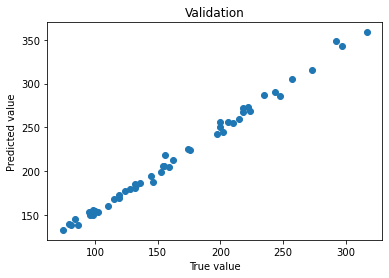

Epoch:  3
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.3353798268238704
MAE:  42.06530564778646
MSE:  2740.081136992588


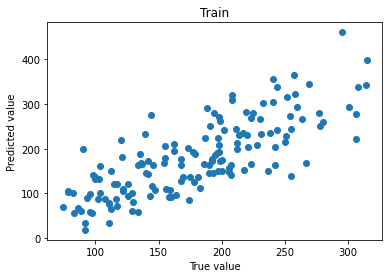

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2852598905563355
MAE:  70.38691064453126
MSE:  5928.460774882713


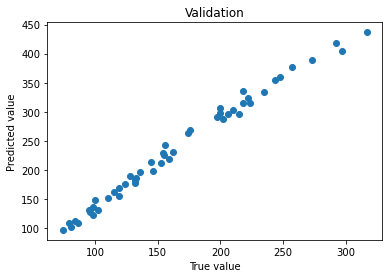

Epoch:  4
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.240597009062767
MAE:  31.86078149414062
MSE:  1798.8656260242767


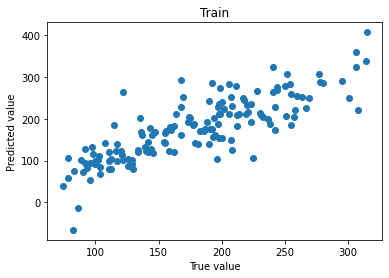

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.800817249417305
MAE:  11.459078417968753
MSE:  245.56310743906644


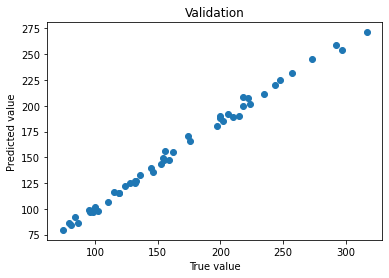

Epoch:  5
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.1747700754801433
MAE:  32.093167317708335
MSE:  1677.1348363159707


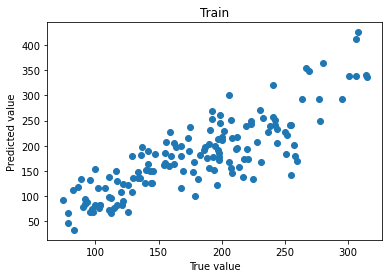

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9001707547903061
MAE:  38.61347958984375
MSE:  1533.3826522068696


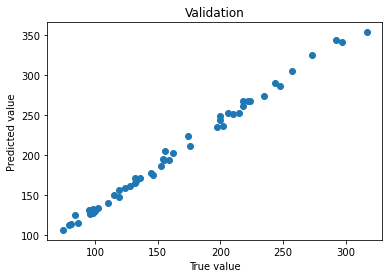

Epoch:  6
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0651894521713257
MAE:  24.29968170572917
MSE:  1016.9514190362405


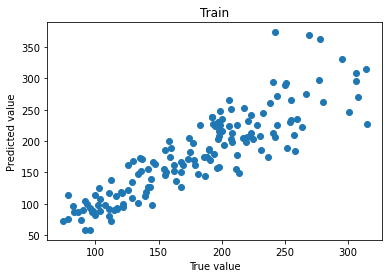

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.1993404281139375
MAE:  4.129969238281249
MSE:  23.941645873795977


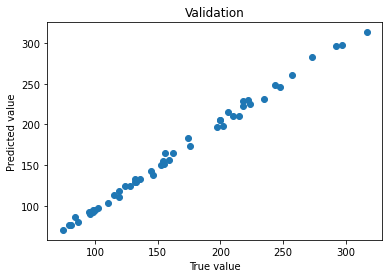

Epoch:  7
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.1159958700338999
MAE:  26.77456100260417
MSE:  1230.565042702089


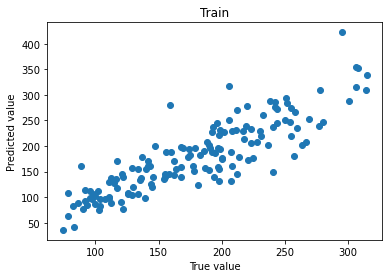

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0221270251274108
MAE:  12.38177646484375
MSE:  187.492943658688


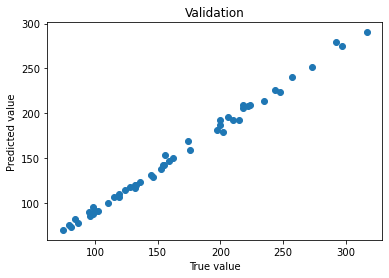

Epoch:  8
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.1172849621375402
MAE:  32.39379656575521
MSE:  1718.3291485158913


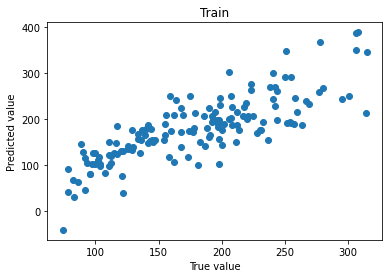

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9309170025587082
MAE:  19.033921582031248
MSE:  396.0407505401015


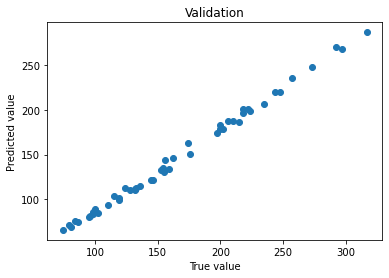

Epoch:  9
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0838883096973102
MAE:  24.42066393229167
MSE:  1236.4953417756929


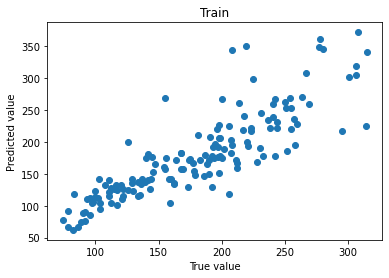

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9404184401035309
MAE:  13.5767861328125
MSE:  239.59782529177664


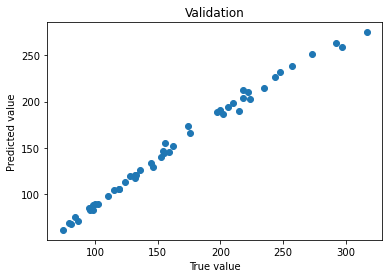

Epoch:  10
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0399982293446859
MAE:  19.61759669596354
MSE:  677.9777773410749


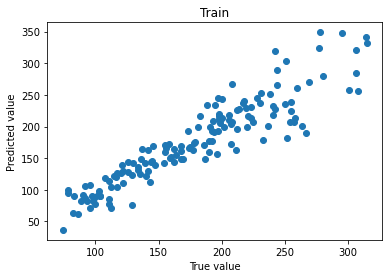

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8167283344268799
MAE:  34.20250361328125
MSE:  1465.5629028727767


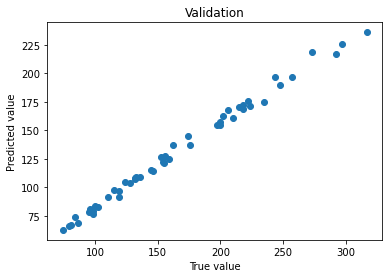

Epoch:  11
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0138991258541743
MAE:  28.662999772135414
MSE:  1140.2451360191149


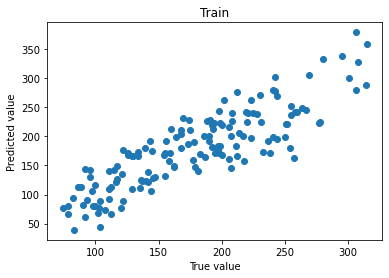

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.0684854179620742
MAE:  5.916072363281249
MSE:  51.93221645657394


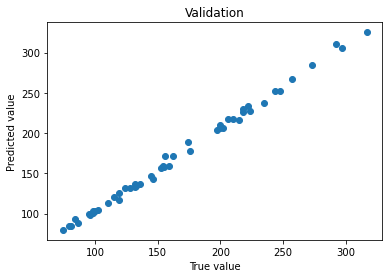

Epoch:  12
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0234452019135156
MAE:  23.48500345052083
MSE:  938.3010060388638


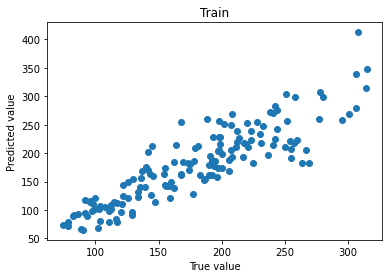

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9349885046482086
MAE:  29.621346386718752
MSE:  937.7833250805669


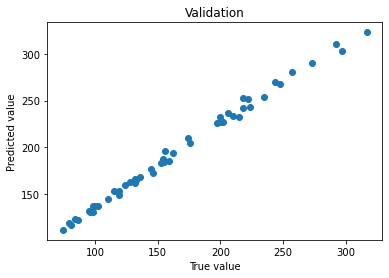

Epoch:  13
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0513842876752217
MAE:  22.076861555989588
MSE:  893.9190096567575


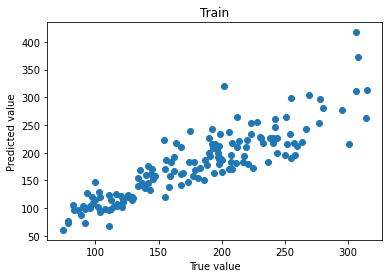

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.5985092383623123
MAE:  36.83770556640625
MSE:  1424.2025670833482


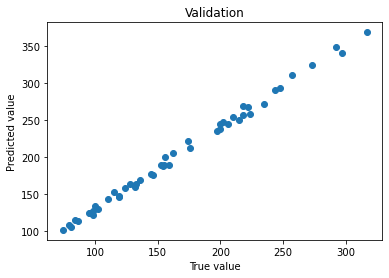

Epoch:  14
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9798662970463435
MAE:  18.813383528645833
MSE:  566.7350564879781


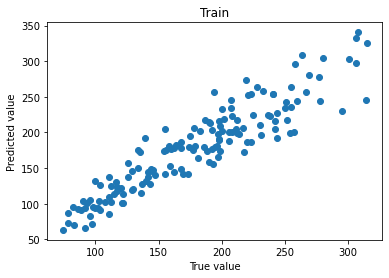

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2128723084926605
MAE:  3.5099422851562507
MSE:  19.69687418104411


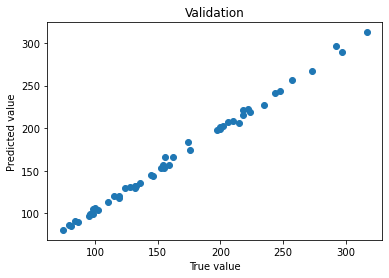

Epoch:  15
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.981824342807134
MAE:  14.147715559895833
MSE:  356.09648001554075


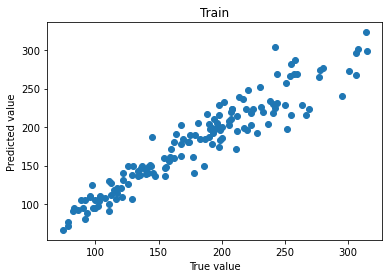

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8756801253557205
MAE:  6.960453808593751
MSE:  71.43660850227594


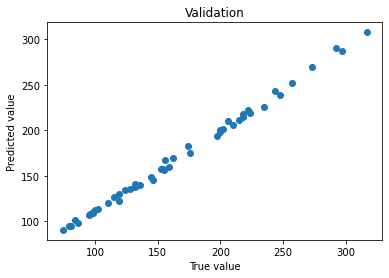

Epoch:  16
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9742317952712377
MAE:  15.183660807291666
MSE:  447.0358292731015


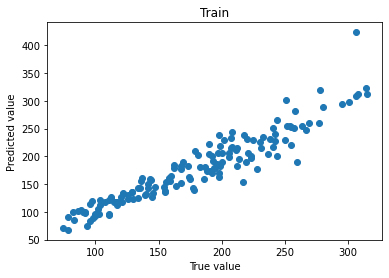

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7508229458332062
MAE:  22.653691308593753
MSE:  528.810967307179


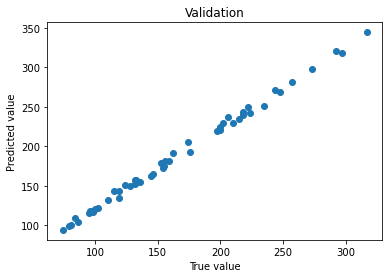

Epoch:  17
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9818330198526383
MAE:  19.233601009114583
MSE:  674.6180855473348


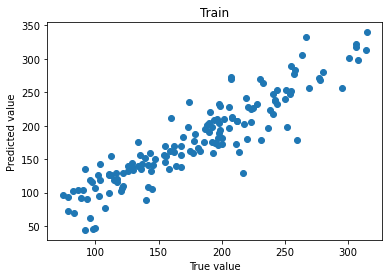

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.707080852985382
MAE:  15.027994531250002
MSE:  264.7967339580126


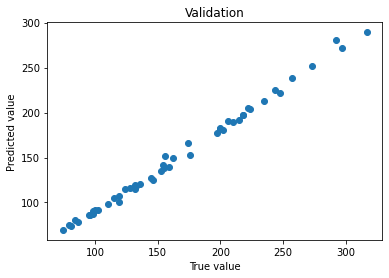

Epoch:  18
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.939428400794665
MAE:  12.918555436197915
MSE:  344.77128644724985


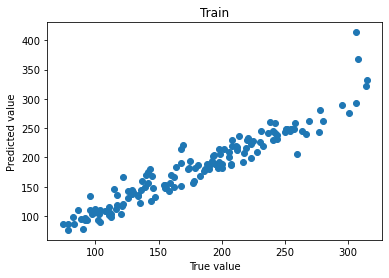

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7955763030052185
MAE:  13.352197460937502
MSE:  215.72373912217145


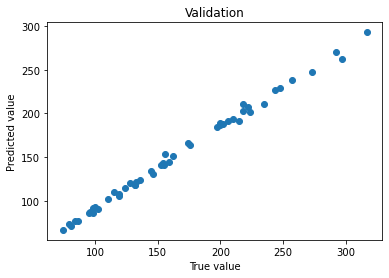

Epoch:  19
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.921648247440656
MAE:  10.245451757812502
MSE:  204.1441123997666


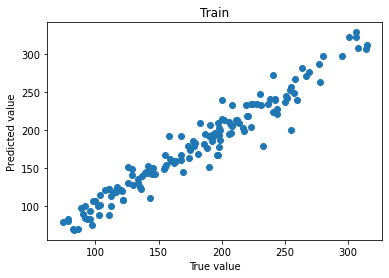

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7872921454906464
MAE:  4.2303292968749995
MSE:  25.555843006529802


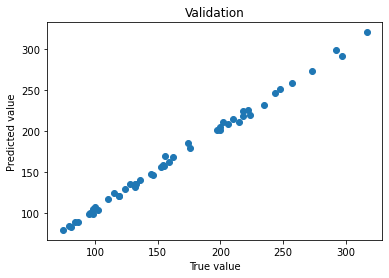

Epoch:  20
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9380818210045496
MAE:  19.442223046875
MSE:  586.1001696570319


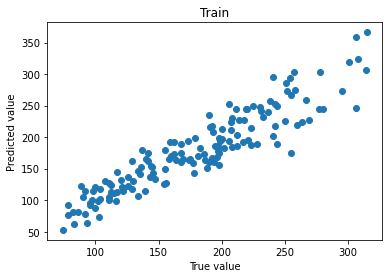

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9834944200515747
MAE:  24.38201943359375
MSE:  607.9542086275145


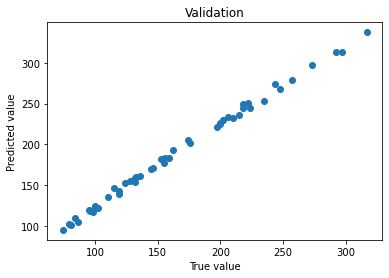

Epoch:  21
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9045002929369609
MAE:  11.735961946614585
MSE:  251.52512065685292


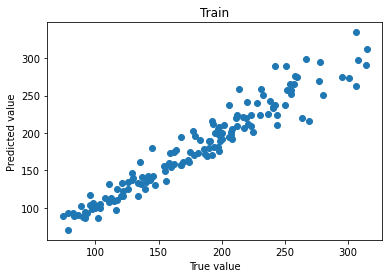

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  1.2001307594776154
MAE:  5.8613549804687475
MSE:  44.130568750731925


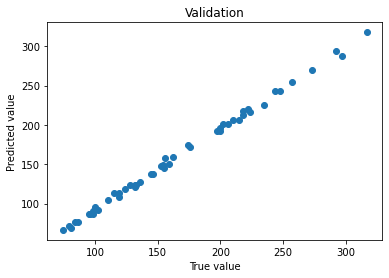

Epoch:  22
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9183579276005427
MAE:  15.52454375
MSE:  472.89924719065766


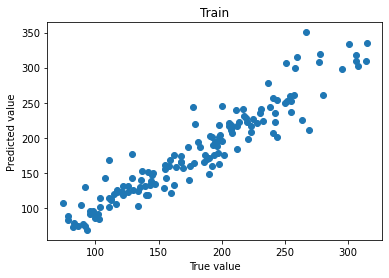

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9301905757188798
MAE:  21.6838580078125
MSE:  510.93792472767643


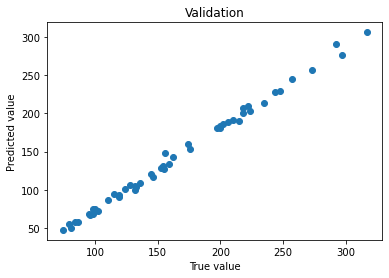

Epoch:  23
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.943801039258639
MAE:  18.421155110677084
MSE:  530.6143579110077


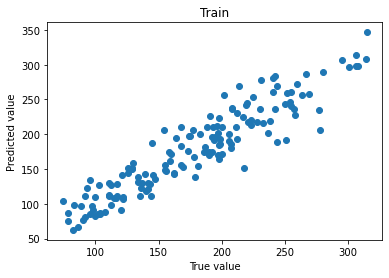

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.9484742194414139
MAE:  24.56529072265625
MSE:  625.5583414069191


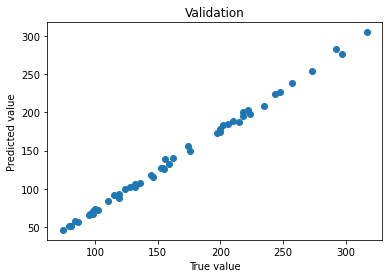

Epoch:  24
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9004241476456324
MAE:  12.15601083984375
MSE:  241.0928268626113


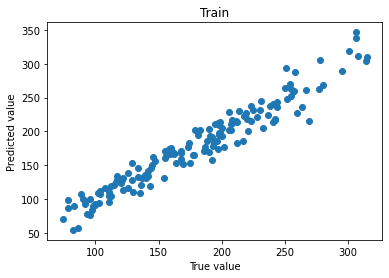

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7619266444444657
MAE:  2.206271972656249
MSE:  7.792614257851117


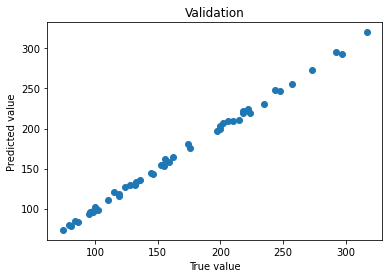

Epoch:  25
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.863302377263705
MAE:  10.356872233072917
MSE:  228.91254298508093


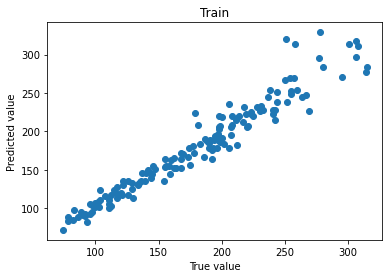

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.5775676143169403
MAE:  7.493839355468752
MSE:  67.41554616288424


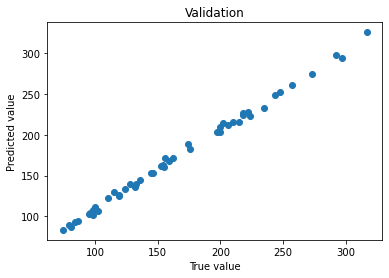

Epoch:  26
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8924963637193044
MAE:  8.754819856770832
MSE:  134.28763071033032


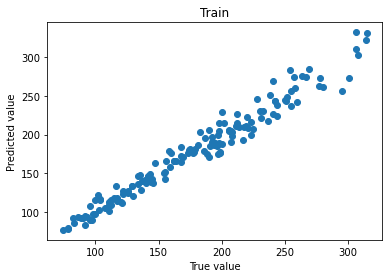

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8282030338048935
MAE:  3.775970996093749
MSE:  19.714104852434634


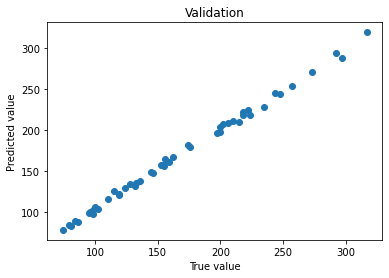

Epoch:  27
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8994741670290629
MAE:  9.505625325520832
MSE:  156.16788037667905


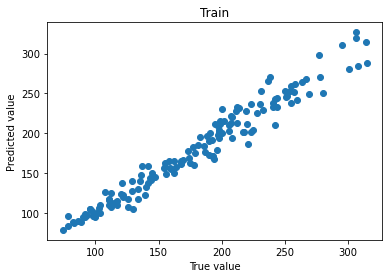

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.932445262670517
MAE:  9.581921093750001
MSE:  116.16920599117377


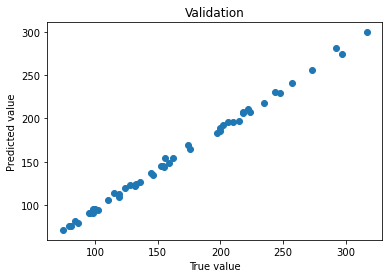

Epoch:  28
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8666604155302048
MAE:  6.449958756510417
MSE:  73.10274082961386


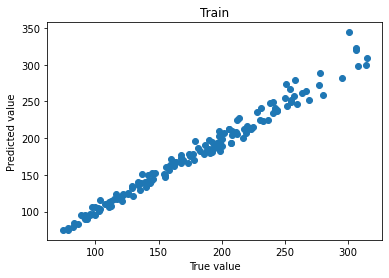

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.878235484957695
MAE:  2.5178785156249965
MSE:  11.528090370494825


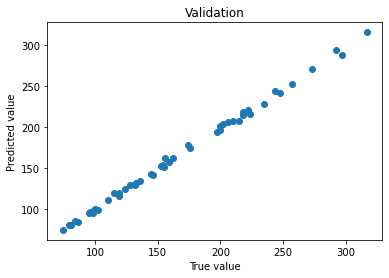

Epoch:  29
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8697691363096237
MAE:  7.685086425781251
MSE:  113.25330374921371


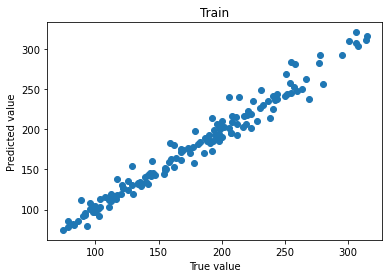

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7412366092205047
MAE:  2.11843779296875
MSE:  7.947039794212822


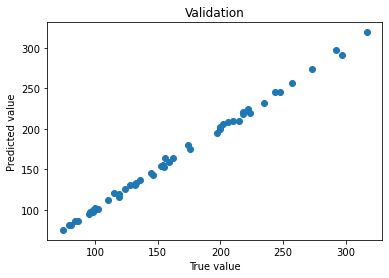

Epoch:  30
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8531007758776347
MAE:  5.9438185546875
MSE:  63.509169748502416


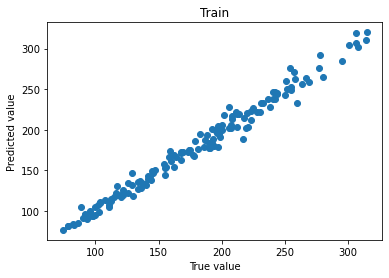

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.757923721075058
MAE:  3.0287919921874993
MSE:  14.520729094938272


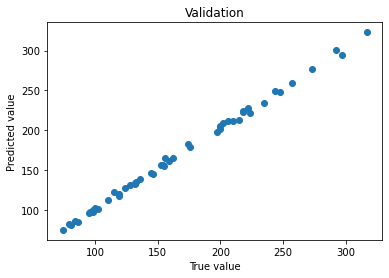

Epoch:  31
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8534156139691671
MAE:  7.072200032552085
MSE:  81.15772339341562


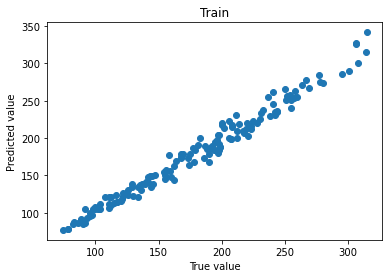

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8218550318479538
MAE:  4.207021093750002
MSE:  23.74823976113796


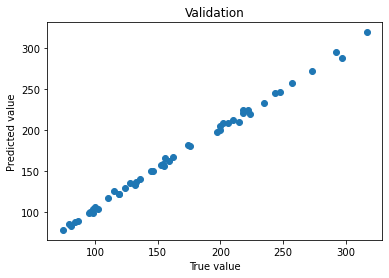

Epoch:  32
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8527906640370687
MAE:  6.762395377604168
MSE:  77.29798831705698


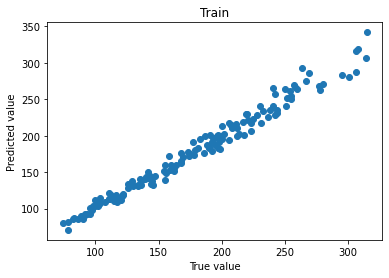

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.5242671656608582
MAE:  2.514686230468752
MSE:  10.250986051207072


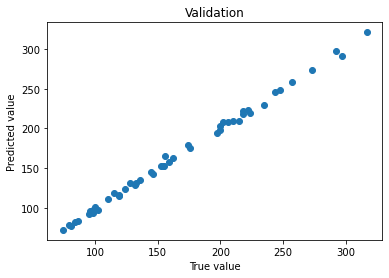

Epoch:  33
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8402642236153285
MAE:  6.5142212565104165
MSE:  78.28038923584126


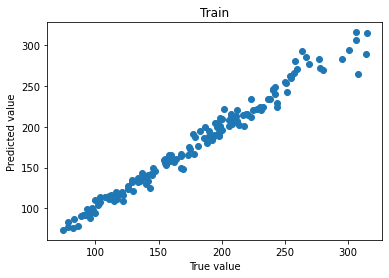

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8933507198095322
MAE:  16.851512792968748
MSE:  405.1628243733773


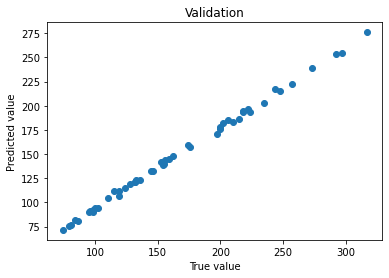

Epoch:  34
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8462626806894938
MAE:  6.299202246093749
MSE:  68.54723089945365


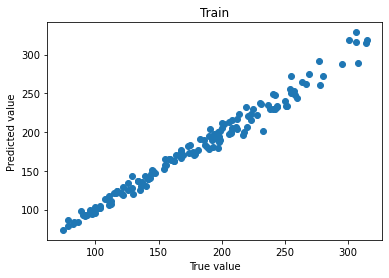

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.689393606185913
MAE:  4.675083300781249
MSE:  37.43277150703286


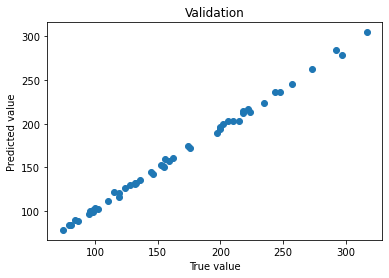

Epoch:  35
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8370570437113444
MAE:  6.0234887044270815
MSE:  65.57542518590559


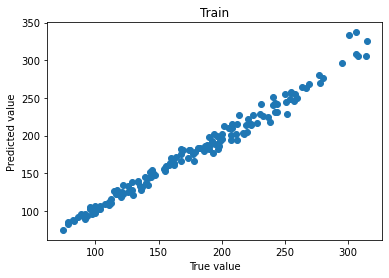

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8224747049808502
MAE:  2.056720312500001
MSE:  8.058921188602447


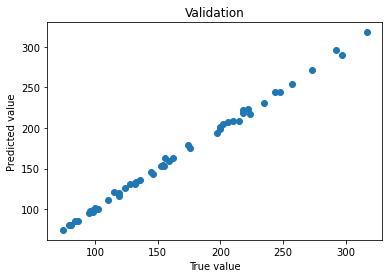

Epoch:  36
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8340546737114588
MAE:  4.1669995117187515
MSE:  32.54003294073758


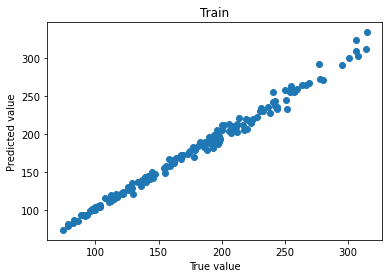

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.6492400181293487
MAE:  2.200598437500002
MSE:  8.61190419748212


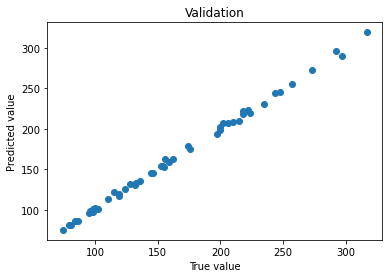

Epoch:  37
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8332134956121444
MAE:  4.466172884114583
MSE:  32.13361936509402


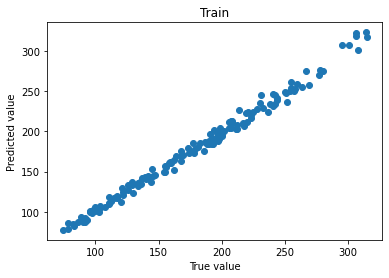

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7452284759283065
MAE:  2.894498339843748
MSE:  15.826028277153478


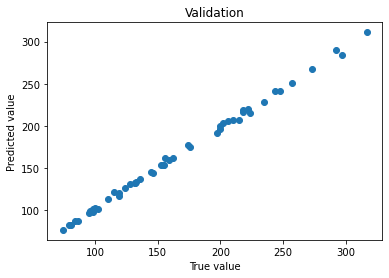

Epoch:  38
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8250178623199463
MAE:  4.05195107421875
MSE:  29.899950674640824


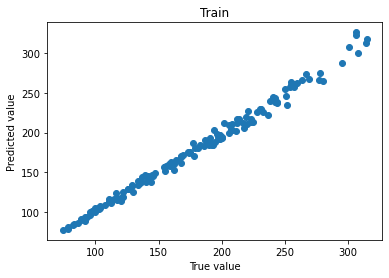

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7768003416061401
MAE:  3.231488574218746
MSE:  20.32937409104011


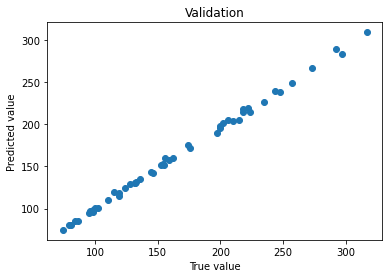

Epoch:  39
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8265712120135625
MAE:  3.526558365885416
MSE:  21.36235732823641


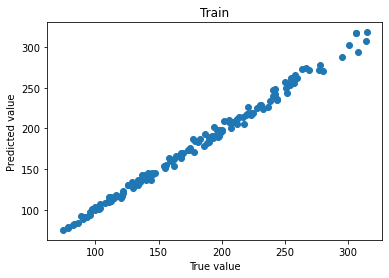

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8346581155061722
MAE:  3.7254522460937496
MSE:  26.727661505386813


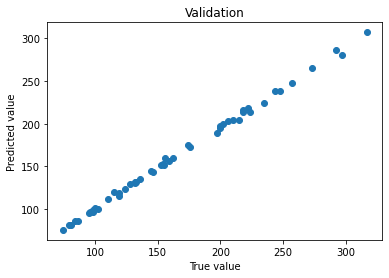

Epoch:  40
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8170612957080206
MAE:  3.6754476888020817
MSE:  23.44588065682235


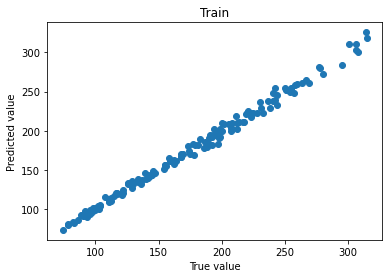

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7600950032472611
MAE:  2.608468359375
MSE:  14.06771778740789


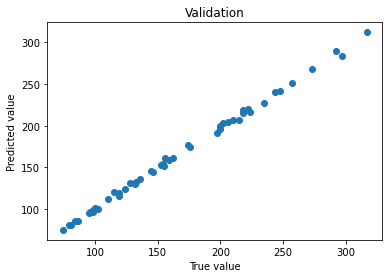

Epoch:  41
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8161199472347895
MAE:  2.9431707356770827
MSE:  15.175132119138237


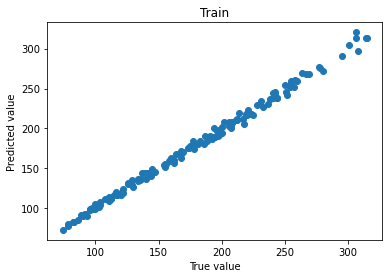

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7504552203416824
MAE:  3.0183249023437497
MSE:  17.451342627232076


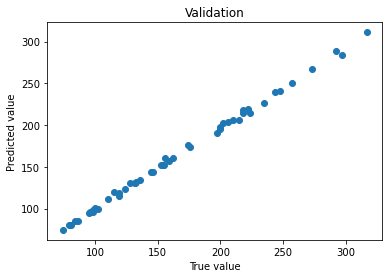

Epoch:  42
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8108528649806976
MAE:  2.9256804687499995
MSE:  14.621578210660616


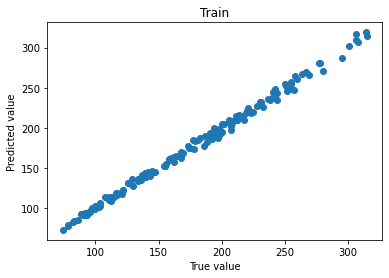

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8572423470020294
MAE:  1.9166610351562499
MSE:  7.591942791975498


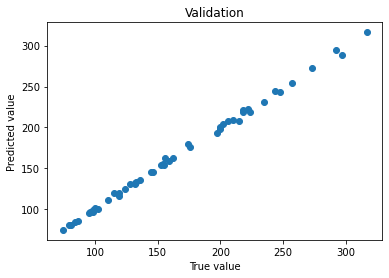

Epoch:  43
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8098972382148107
MAE:  2.5870533854166675
MSE:  11.338438739382434


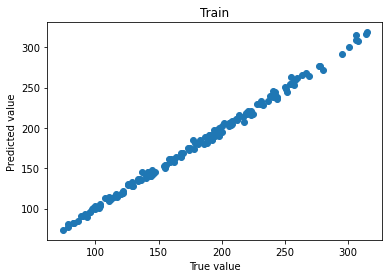

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.8154184365272522
MAE:  2.087802050781249
MSE:  8.303166802893154


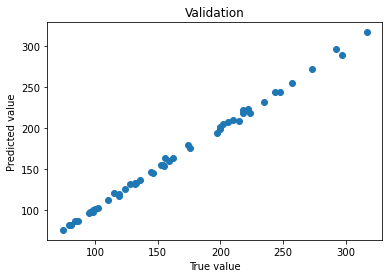

Epoch:  44
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8125079480806986
MAE:  2.6025385091145834
MSE:  10.883514546521031


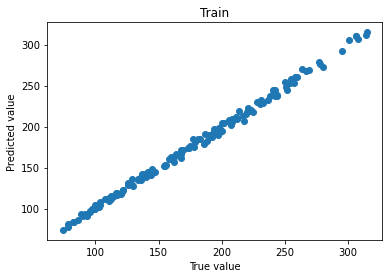

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7403538691997528
MAE:  1.9527669921875017
MSE:  7.962254998979577


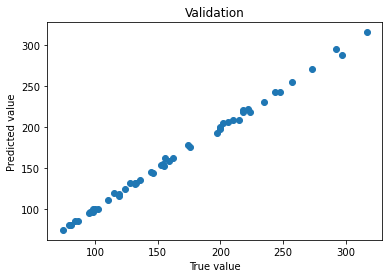

Epoch:  45
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8055935482184092
MAE:  2.3825486653645833
MSE:  10.51793120268456


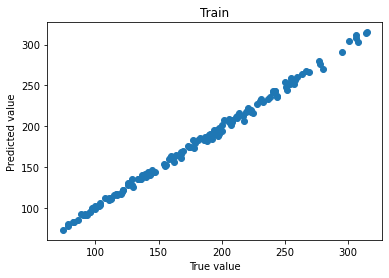

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7895994079113007
MAE:  1.9569795898437496
MSE:  8.063155429701334


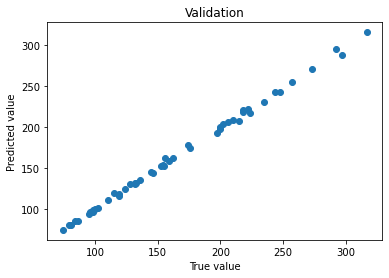

Epoch:  46
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8107919494311014
MAE:  2.4906681640625
MSE:  10.528918328353248


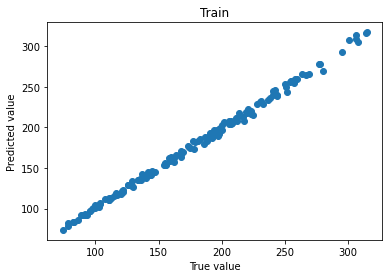

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7420041686296464
MAE:  2.2381171874999986
MSE:  8.627632883689866


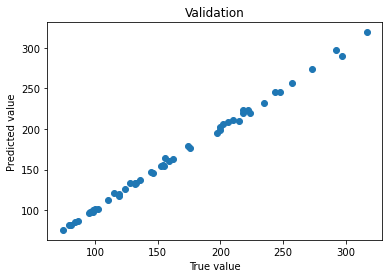

Epoch:  47
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8039801188309987
MAE:  2.418926432291666
MSE:  10.05114806946817


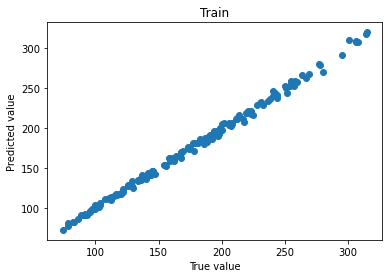

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7050101774930954
MAE:  1.9656029296874993
MSE:  7.957653437082288


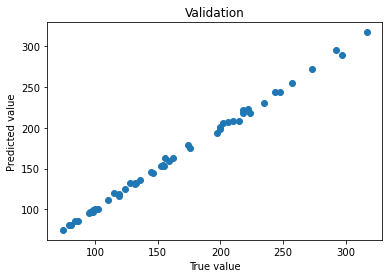

Epoch:  48
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8039586398998896
MAE:  2.360805501302083
MSE:  9.860017052309189


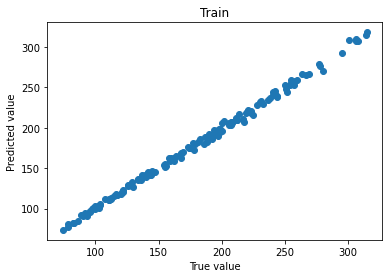

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7057300156354904
MAE:  1.9617841796875013
MSE:  7.844069265946393


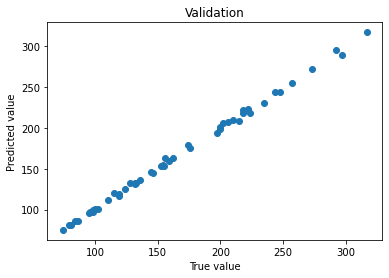

Epoch:  49
Training: 


<ipython-input-24-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8071474186579386
MAE:  2.3103676757812495
MSE:  9.762695079819512


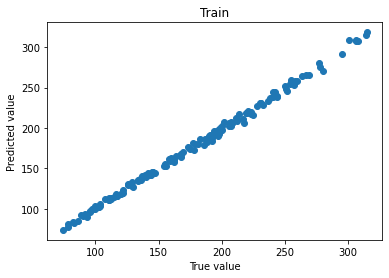

Validation: 


<ipython-input-24-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-24-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()



Mean Loss:  0.7112104803323746
MAE:  1.9655410156249977
MSE:  7.824251663253766


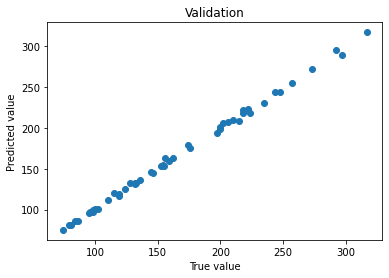

In [26]:
from base import data_loader
from base import train
from torch.autograd import Variable


data_loader = train.get_loader('cell', batch_size=1, horizontal_flip = 0.5, vertical_flip = 0.5)

train_queue = data_loader['train']
valid_queue = data_loader['valid']
model = model.cuda()

epochs = 50

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, float(epochs))

for epoch in range(epochs):
    
    print("Epoch: ", epoch)
    
    train_model(train_queue, model, criterion, optimizer)
    validate_model(valid_queue, model, criterion)
    
    scheduler.step()